In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
import pandas as pd
import os
from scipy.stats import linregress
from merge_data import merge_data

import seaborn as sns
sns.set_style("white")
my_dpi=96

In [3]:
data, cd = merge_data()
data.head()

,Country,Year,HDI,Population,capacity_mw,cap_added,Region
0,Algeria,1990,0.577,25.758869,0.00,0.00,Africa
1,Argentina,1990,0.704,32.618651,761.02,761.02,South/Central America
2,Armenia,1990,0.631,3.538171,0.00,0.00,
3,Austria,1990,0.795,7.677850,13.00,13.00,Europe
4,Bahrain,1990,0.746,0.495931,0.00,0.00,


In [4]:
# create data subset for hard-coded year variable
data = data.astype({'Year':int})
year = 2017
ydata = data[data['Year']==year]

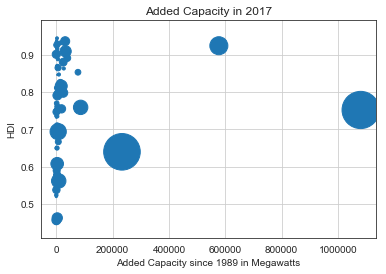

In [5]:
# plot single year raindrop graph
plt.scatter(ydata['capacity_mw'], ydata['HDI'], s=ydata['Population'])

plt.grid()
plt.xlabel("Added Capacity since 1989 in Megawatts")
plt.ylabel("HDI")
plt.title(f"Added Capacity in {year}")
plt.savefig("Regional Energy Gen Over Time.png")
plt.show()


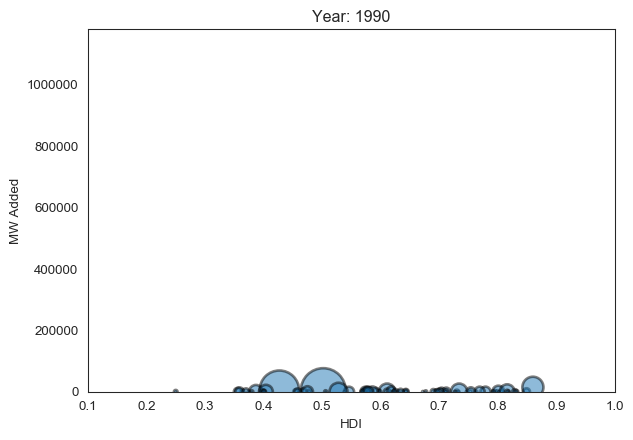

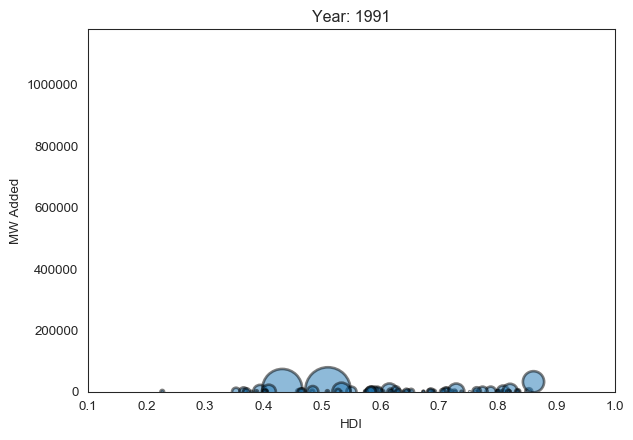

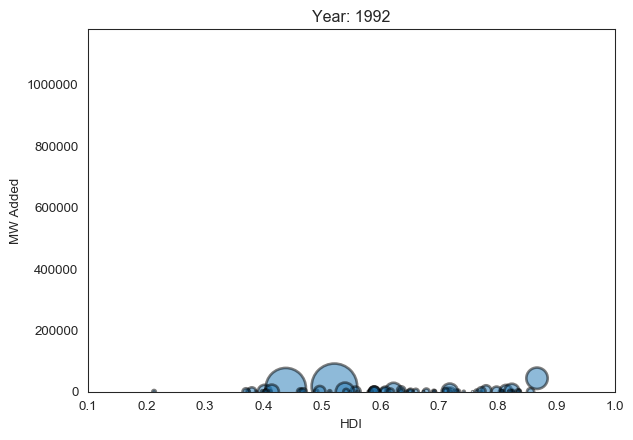

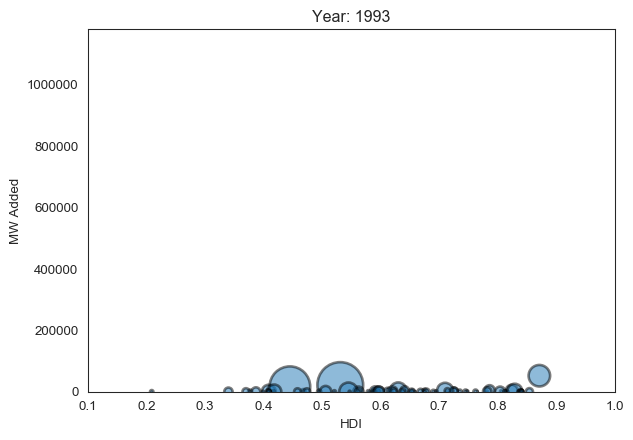

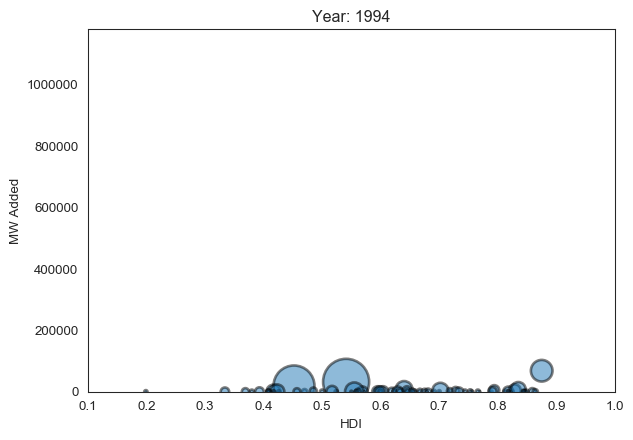

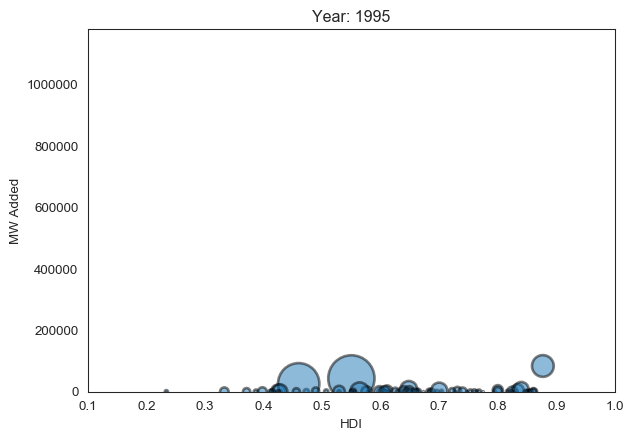

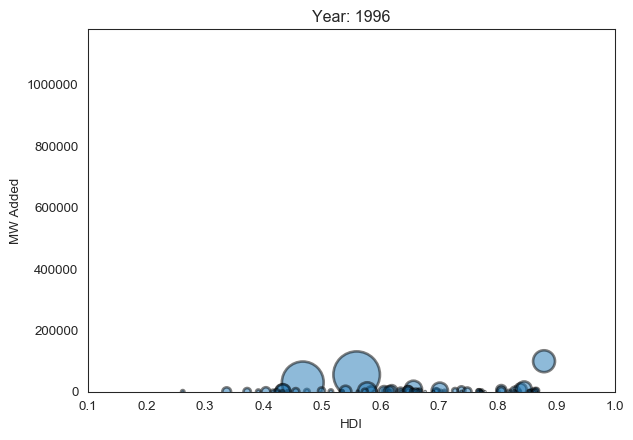

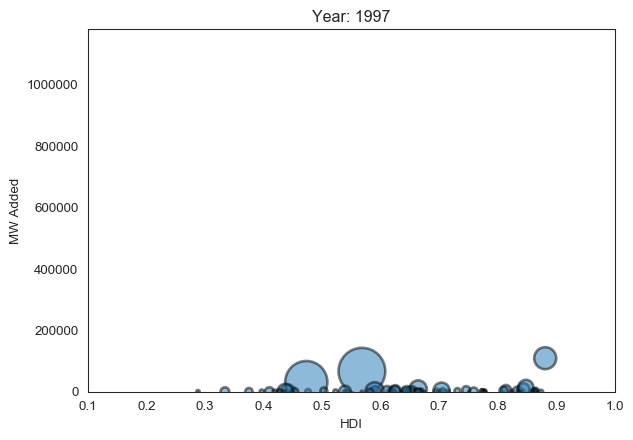

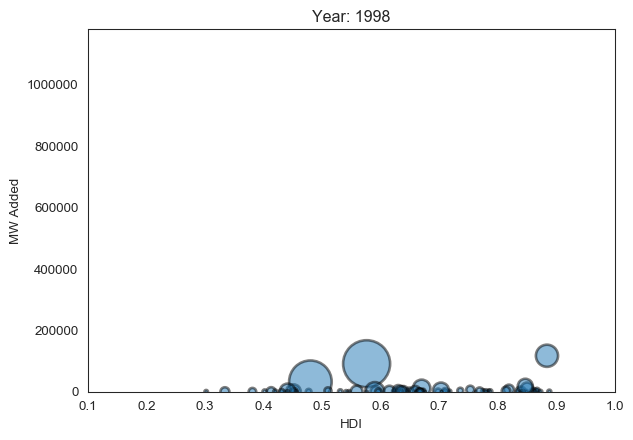

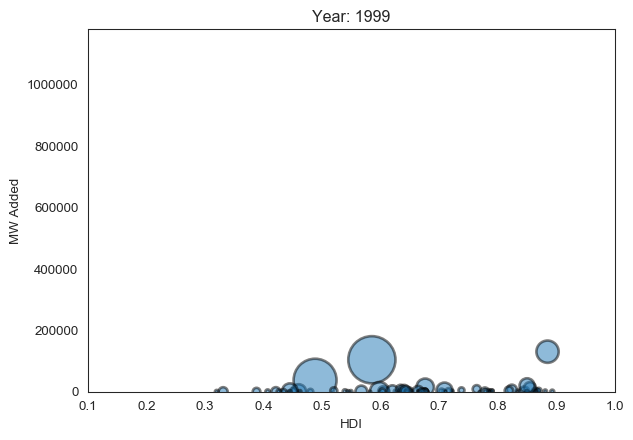

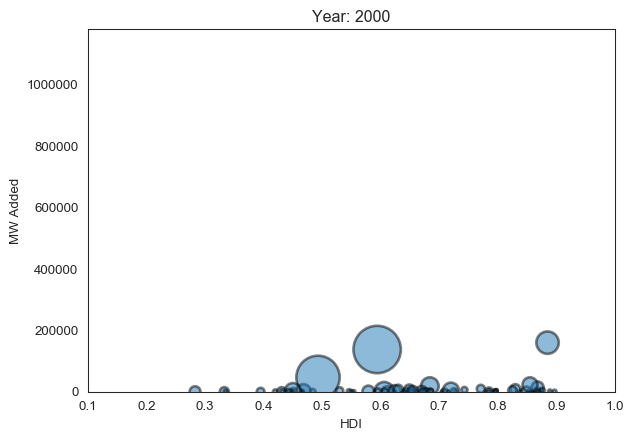

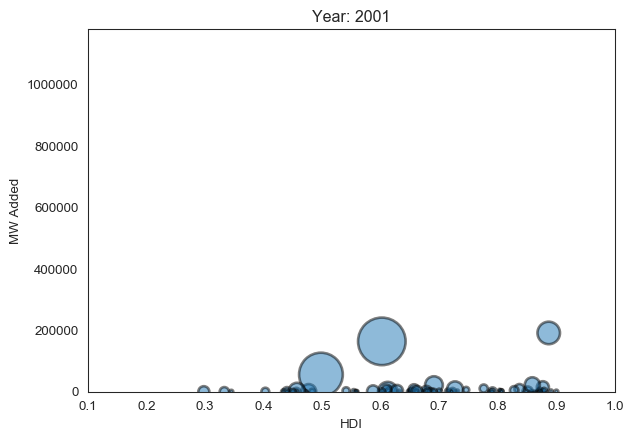

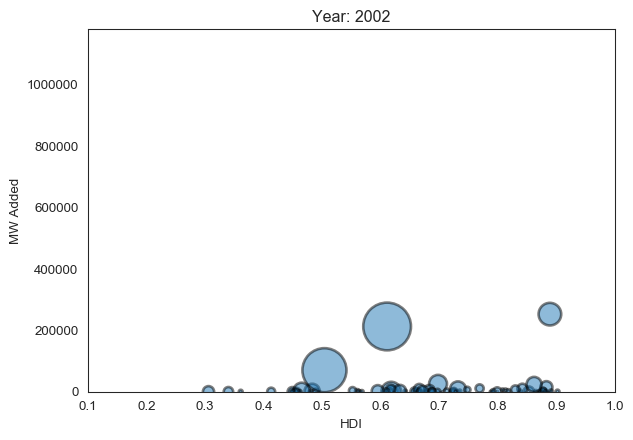

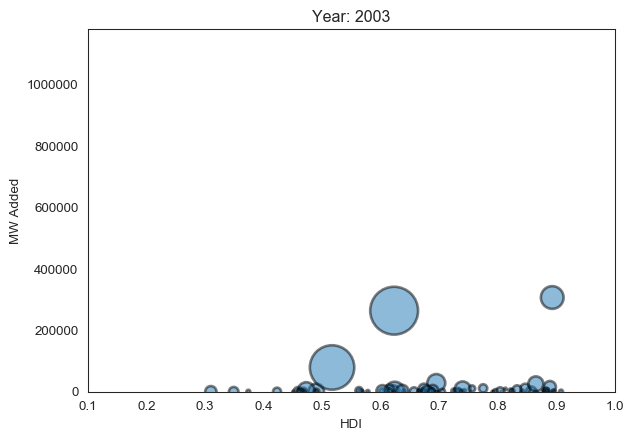

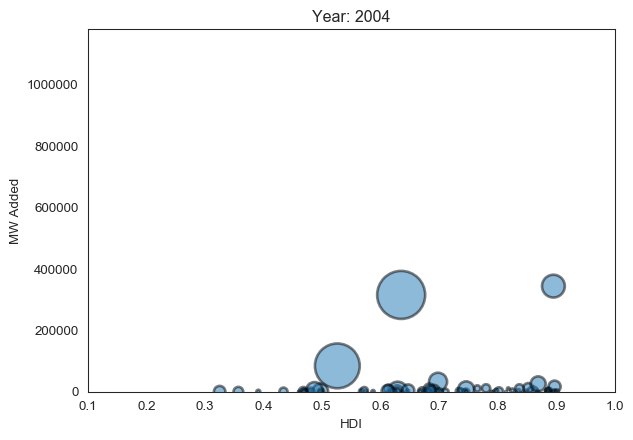

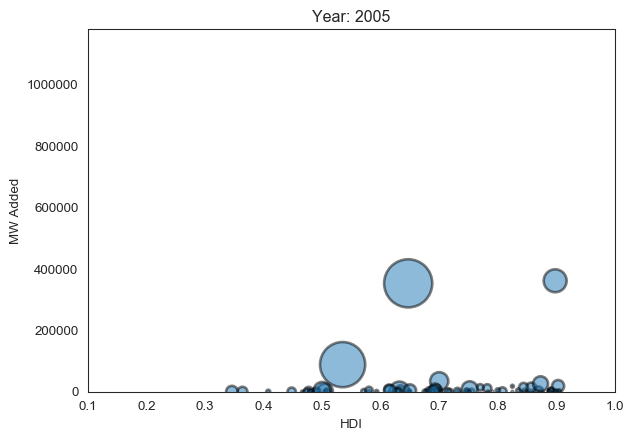

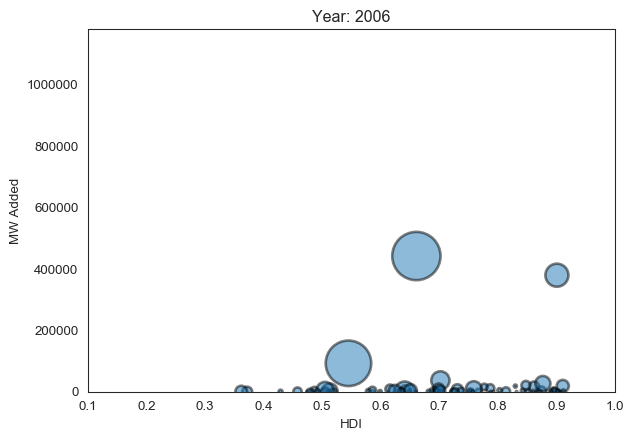

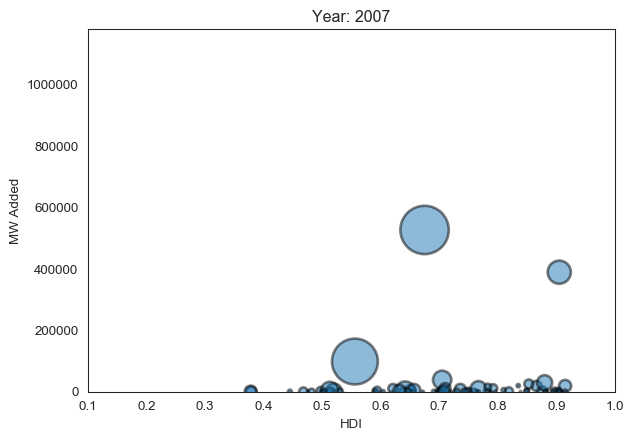

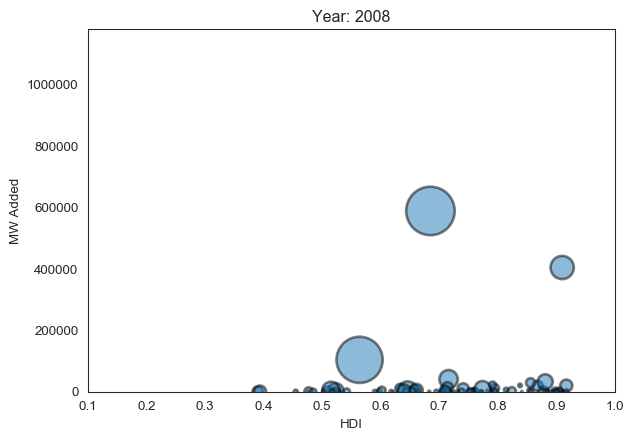

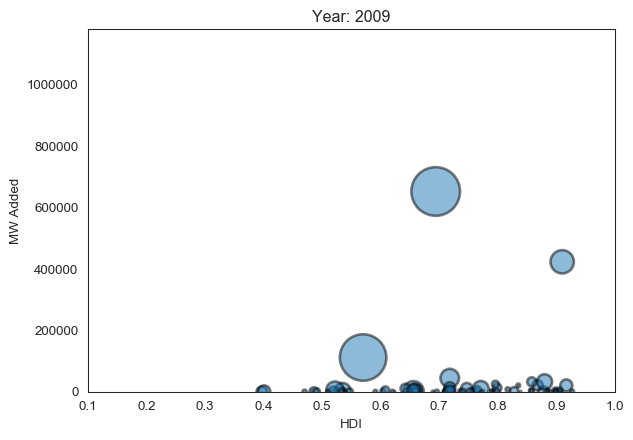

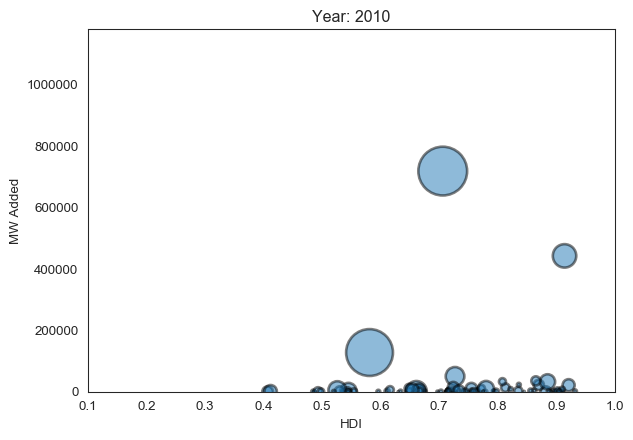

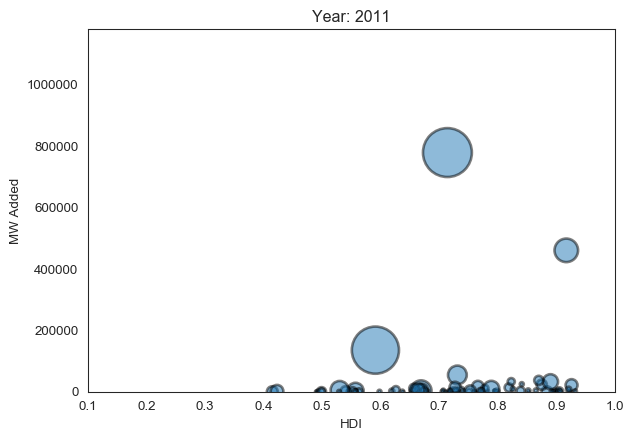

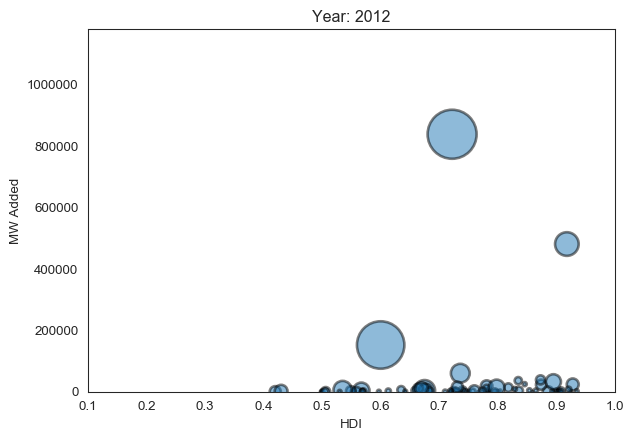

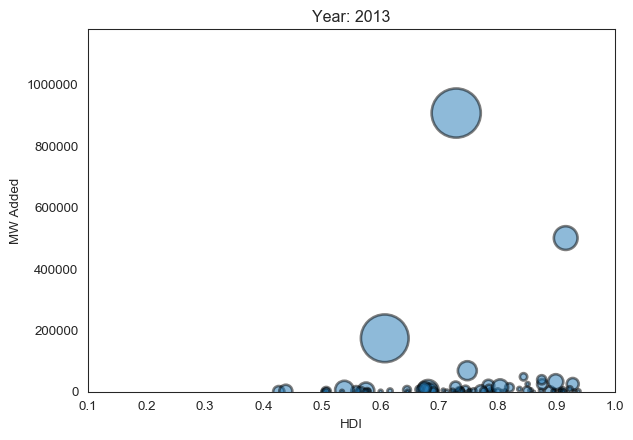

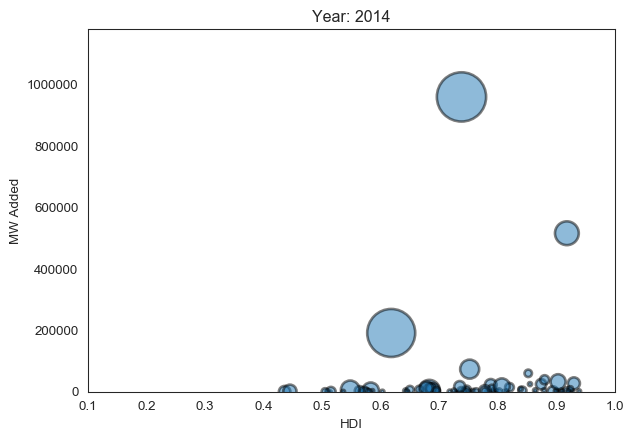

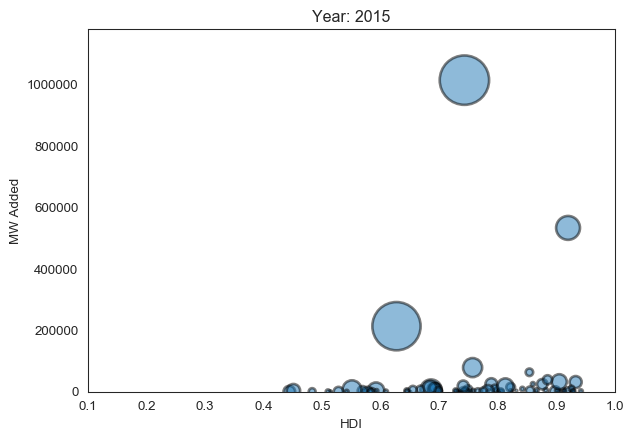

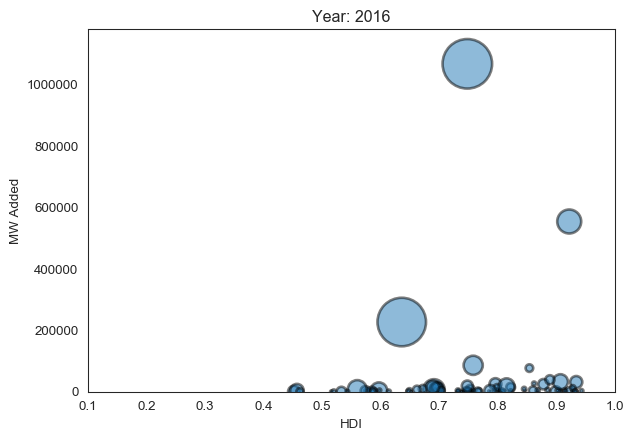

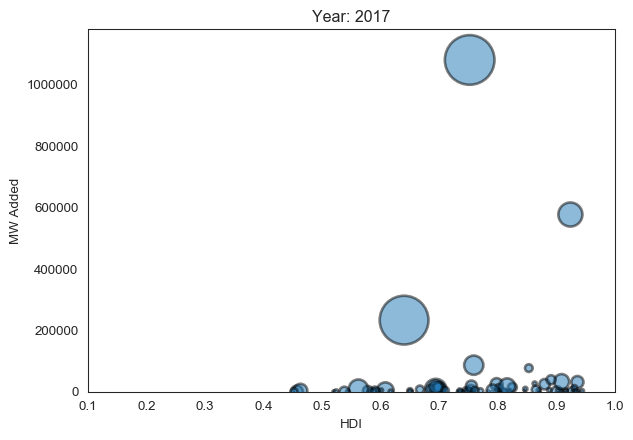

In [7]:
# output .png's for animated gif
for i in data.Year.unique():

    fig = plt.figure(figsize=(680/my_dpi, 480/my_dpi), dpi=my_dpi)
    
    tmp=data[ data.Year == i ]
    
    plt.scatter(tmp['HDI'], tmp['capacity_mw'] , s=tmp['Population'] , cmap="Accent", alpha=0.5, edgecolors="black", linewidth=2)

    plt.xlim([0.1,1.0])
    plt.ylim([0, 1_180_000])
    plt.xlabel("HDI")
    plt.ylabel("MW Added")
    plt.title("Year: "+str(i) )
    
    filename='Powminder_step'+str(i)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()

# using ImageMagick from bash command below to great animated gif file
# convert -delay 80 Powminder*.png animated_gapminder.gif